<a href="https://colab.research.google.com/github/Kira-Stargazer/Enhancing-road-safety-with-AI-driven-traffic-accident-analysis-and-prediction/blob/main/Enhancing_road_safety_with_AI_driven_traffic_accident_analysis_and_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install gradio

import gradio as gr
import io
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ... (rest of the existing import statements) ...

# Function to safely encode a label (same as before)
def safe_transform(label, encoder, label_name):
    if label in encoder.classes_:
        return encoder.transform([label])[0]
    else:
        print(f"Warning: '{label}' not seen during training for {label_name}. Assigning default (0).")
        return 0

# Function to load data and train model (modified for Gradio)
def predict_severity(location, weather, vehicle_count, csv_file):
    # Load data from uploaded CSV
    data = pd.read_csv(csv_file.name)

    # Handle missing values
    data.dropna(inplace=True)

    # Encode categorical columns
    label_encoders = {}
    for col in ["Location", "Weather", "Severity"]:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

    # Feature and target separation
    X = data[["Location", "Weather", "Vehicle_Count"]]
    y = data["Severity"]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Encode input values
    encoded_location = safe_transform(location, label_encoders["Location"], "Location")
    encoded_weather = safe_transform(weather, label_encoders["Weather"], "Weather")

    # Create input DataFrame
    sample_input = pd.DataFrame([{
        "Location": encoded_location,
        "Weather": encoded_weather,
        "Vehicle_Count": vehicle_count
    }])

    # Make prediction
    predicted_severity = model.predict(sample_input)
    predicted_label = label_encoders["Severity"].inverse_transform(predicted_severity)[0]

    return predicted_label

# Create Gradio interface
iface = gr.Interface(
    fn=predict_severity,
    inputs=[
        gr.Dropdown(["Downtown", "Suburb", "Rural"], label="Location"),
        gr.Dropdown(["Rainy", "Sunny", "Snowy"], label="Weather"),
        gr.Number(label="Vehicle Count"),
        gr.File(label="Upload CSV Data", file_types=['.csv'])
    ],
    outputs="text",  # Output is the predicted severity level
    title="Accident Severity Prediction"
)

iface.launch()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.0 MB/s eta 0:00:00
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ea1331d461f3a86e77.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory 

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Feature Importances:
Location: 0.19
Weather: 0.34
Vehicle_Count: 0.47


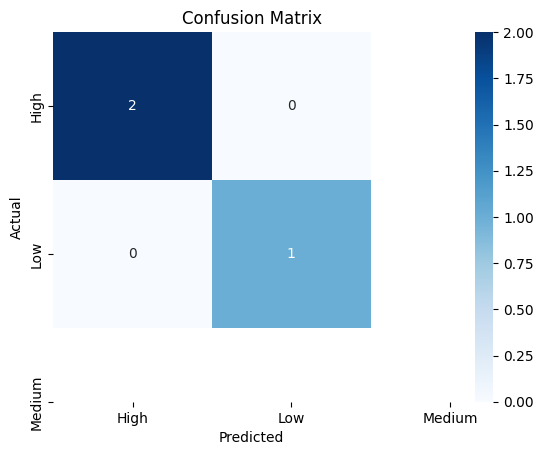

Predicted Severity Level: High


In [9]:
!pip install ipywidgets

import io
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# File Upload Widget
uploader = widgets.FileUpload(
    accept='.csv',
    multiple=False
)

display(uploader)

# Function to safely encode a label
def safe_transform(label, encoder, label_name):
    if label in encoder.classes_:
        return encoder.transform([label])[0]
    else:
        print(f"Warning: '{label}' not seen during training for {label_name}. Assigning default (0).")
        return 0

# Function to load data and train model
def load_and_train(change):
    uploaded_filename = next(iter(uploader.value))
    content = uploader.value[uploaded_filename]['content']
    data = pd.read_csv(io.BytesIO(content))

    # Handle missing values
    data.dropna(inplace=True)

    # Encode categorical columns
    label_encoders = {}
    for col in ["Location", "Weather", "Severity"]:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

    # Feature and target separation
    X = data[["Location", "Weather", "Vehicle_Count"]]
    y = data["Severity"]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate model
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Feature importance
    print("\nFeature Importances:")
    for name, importance in zip(X.columns, model.feature_importances_):
        print(f"{name}: {importance:.2f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoders["Severity"].classes_,
                yticklabels=label_encoders["Severity"].classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # Prediction example
    input_location = "Downtown"
    input_weather = "Rainy"
    input_vehicle_count = 15

    encoded_location = safe_transform(input_location, label_encoders["Location"], "Location")
    encoded_weather = safe_transform(input_weather, label_encoders["Weather"], "Weather")

    sample_input = pd.DataFrame([{
        "Location": encoded_location,
        "Weather": encoded_weather,
        "Vehicle_Count": input_vehicle_count
    }])

    predicted_severity = model.predict(sample_input)
    predicted_label = label_encoders["Severity"].inverse_transform(predicted_severity)
    print("Predicted Severity Level:", predicted_label[0])

# Observe file upload changes
uploader.observe(load_and_train, names='value')

# --- Fix for nbconvert ---
# Remove widget state metadata to avoid the "state" key error during conversion.
from IPython.display import clear_output
clear_output(wait=True)
# --- End of Fix ---